<h1 align=center><font size = 5>Data Analysis with Python</font></h1>
                                



###      <h1 align=center><font size = 5> The dataset “telecom customer churn”</font></h1>

<h1>Introduction</h1>
<h3>Welcome!</h3>

<p>
Today we are going to work on "telecom customer chrun" dataset. you can find the file available on Kaggle or just follow this link: <br>
    data source: <a href="https://www.kaggle.com/blastchar/telco-customer-churn>" target="_blank">https://www.kaggle.com/blastchar/telco-customer-churn></a>
    
The main goal of this section is to test the ability of ‘KNN’ algorithm to predict customer churn.<br>
So, we are tasked to make a prediction of customer churn by using the “KNN” algorithm.<br>
<ul>    
   <li> 1. In a first step ,make the prediction by using just numeric variables. </li>
   <li>2. In a next step, make the prediction by using numeric and categorical variables.</li>
</ul>
    
</p>

<h1>Step 1:make the prediction by using just numeric variables: </h1>

<p> First of all, we are going to libraries needed to do this task </p>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<p> 
Here we are going to import the CSV file. I shared with you the data link above.
My data is stored in the desktop of the laptop.
</p>

In [7]:
path = 'C:/Users/laptop/Desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(path)
# show the first 5 rows using dataframe.head() method to make it clear 
df.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<h2> check whether we have missing data </h2>
<p>The missing values are converted to Python’s default. We use Python’s built-in functions to identify
these missing values. 
The output is a boolean value indicating whether the value that is passed into the argument is in
fact missing data. </p>

In [20]:
missing_data = df.isnull()
missing_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<h2>Info</h2>
Another method you can use to check your dataset is:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<h2> the train test split </h2>

<p> the train_test_split Splits arrays or matrices into random train and test subsets. Quick utility that wraps input validation 
and next(ShuffleSplit().split(X, y)) and application to input data into a single call for splitting
(and optionally subsampling) data in a oneliner.</p>

In [11]:
# Size taken from the dataset and is known
X = np.zeros((7043, 21), dtype='float')
y = np.zeros((7043,), dtype='bool')


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30)
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 4930 samples in the training dataset
There are 2113 samples in the testing dataset
Each sample has 21 features


<h2> Use of KNN in order to predict </h2>

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
estimator = KNeighborsClassifier()

In [19]:
estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [54]:
y_pred = estimator.predict(X_test)

<h2> Choose the K Value </h2>

In [53]:
error_rate = []

for i in range(1,40):
    
    estimator = KNeighborsClassifier(n_neighbors=i)
    estimator.fit(X_train,y_train)
    pred_i = estimator.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) 

<p>Now we are going to insert graphs using matpolib library. <br>
the graph is Error rate VS. K Value with K on X label and Error Rate on Y label.
</p>

Text(0, 0.5, 'Error Rate')

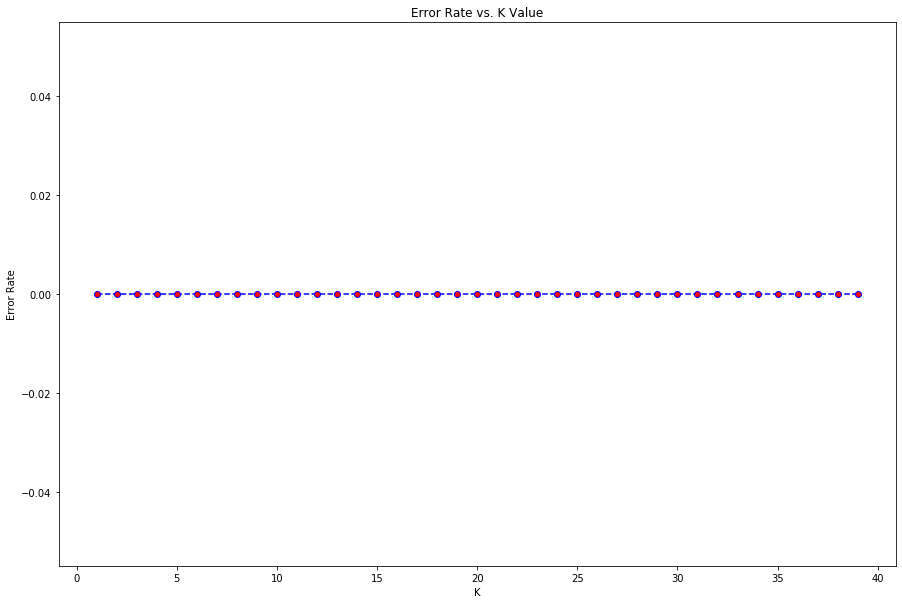

In [51]:
plt.figure(figsize=(15,10))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

<h2>Note </h2>
<p>After this analysis, we need to check the the graph to make some predictions about the value of K.
Unforetunately the graph did not work in my analysis. </p>

<br>
<br>
<br>
<h1>Second step, make the prediction by using numeric and categorical variables</h1>

<h2>Converting Categorical Features</h2>
<p>We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs. </p>

In [44]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df=pd.get_dummies(df, columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'],dummy_na=False,drop_first=True)

In [47]:
df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.5,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


<h2> Use of KNN in order to predict  </h2>

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
estimator = KNeighborsClassifier(n_neighbors=1)

In [58]:
estimator.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [59]:
pred = estimator.predict(X_test)

<h2> Choose the K Value </h2>

In [55]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    estimator = KNeighborsClassifier(n_neighbors=i)
    estimator.fit(X_train,y_train)
    pred_i = estimator.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

<p>Now we are going to insert graphs using matpolib library. <br>
the graph is Error rate VS. K Value with K on X label and Error Rate on Y label.
</p>

Text(0, 0.5, 'Error Rate')

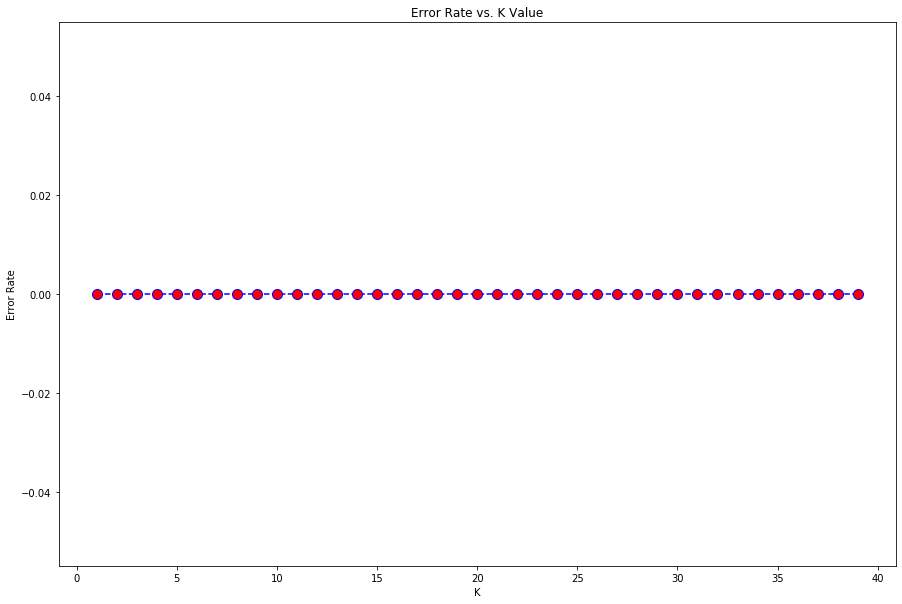

In [61]:
plt.figure(figsize=(15,10))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

<h2>Note </h2>
<p>After this analysis, we need to check the the graph to make some predictions about the value of K.
Unforetunately the graph did not work in my analysis. </p>

<br>
<br>
<br>
<br>
<br>

<h2> Arij Sahli </h2>